(haldane-bp-nb)=
# Haldane model Berry phases and curvatures

In [1]:
from pythtb import TBModel, WFArray, Mesh
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# define lattice vectors
lat = [[1, 0], [1/2, np.sqrt(3)/2]]
# define coordinates of orbitals
orb = [[1/3, 1/3], [2/3, 2/3]]

# make two dimensional tight-binding Haldane model
my_model = TBModel(2, 2, lat, orb)

# set model parameters
delta = 0
t = -1
t2 = 0.15 * np.exp(1j*np.pi/2)
t2c = t2.conjugate()

# set on-site energies
my_model.set_onsite([-delta, delta])
# set hoppings (one for each connected pair of orbitals)
# (amplitude, i, j, [lattice vector to cell containing j])
my_model.set_hop(t, 0, 1, [0, 0])
my_model.set_hop(t, 1, 0, [1, 0])
my_model.set_hop(t, 1, 0, [0, 1])
# add second neighbour complex hoppings
my_model.set_hop(t2, 0, 0, [1, 0])
my_model.set_hop(t2, 1, 1, [1, -1])
my_model.set_hop(t2, 1, 1, [0, 1])
my_model.set_hop(t2c, 1, 1, [1, 0])
my_model.set_hop(t2c, 0, 0, [1, -1])
my_model.set_hop(t2c, 0, 0, [0, 1])

print(my_model)

----------------------------------------
       Tight-binding model report       
----------------------------------------
r-space dimension           = 2
k-space dimension           = 2
number of spin components   = 1
periodic directions         = [0, 1]
number of orbitals          = 2
number of electronic states = 2

Lattice vectors (Cartesian):
  # 0 ===> [ 1.000 ,    0   ]
  # 1 ===> [ 0.500 ,  0.866 ]
Orbital vectors (dimensionless):
  # 0 ===> [ 0.333 ,  0.333 ]
  # 1 ===> [ 0.667 ,  0.667 ]
Site energies:
  # 0 ===>  0.000 
  # 1 ===>  0.000 
Hoppings:
  < 0 | H | 1 + [ 0.0 ,  0.0 ] >  ===> -1.0000
  < 1 | H | 0 + [ 1.0 ,  0.0 ] >  ===> -1.0000
  < 1 | H | 0 + [ 0.0 ,  1.0 ] >  ===> -1.0000
  < 0 | H | 0 + [ 1.0 ,  0.0 ] >  ===> 0.0000+0.1500j
  < 1 | H | 1 + [ 1.0 , -1.0 ] >  ===> 0.0000+0.1500j
  < 1 | H | 1 + [ 0.0 ,  1.0 ] >  ===> 0.0000+0.1500j
  < 1 | H | 1 + [ 1.0 ,  0.0 ] >  ===> 0.0000-0.1500j
  < 0 | H | 0 + [ 1.0 , -1.0 ] >  ===> 0.0000-0.1500j
  < 0 | H | 0 + [ 0.0 ,

## Using `WFArray`

Generate object of type `WFArray` that will be used for Berry phase and curvature calculations

In [3]:
mesh = Mesh(dim_k=2, axis_types=['k', 'k'])
mesh.build_grid(shape=(31, 31), gamma_centered=True)
print(mesh)

Mesh Summary
Type: grid
Dimensionality: 2 k-dim(s) + 0 λ-dim(s)
Number of mesh points: 961
Full shape: (31, 31, 2)
k-shape: (31, 31)
λ-shape: ()
k-axes: [0, 1]
λ-axes: []
Axis names: [k_0, k_1]
Endpoints included on axis: [◦, ◦]   (• yes, ◦ no/unknown)
Is a torus in k-space (all k-axes wrap): yes
Periodic axes: (axis 0, comp 0), (axis 1, comp 1)
Closed axes: None


In [4]:
wf_array_1 = WFArray(my_model, mesh)
wf_array_1.solve_mesh()

Calculate Berry phases around the BZ in the $k_x$ direction (which can be interpreted as the 1D hybrid Wannier center in the $x$ direction) and plot results as a function of $k_y$.

In [5]:
# Berry phases along k_x for lower band
phi_0 = wf_array_1.berry_phase(0, [0], contin=True)
# Berry phases along k_x for upper band
phi_1 = wf_array_1.berry_phase(0, [1], contin=True)
# Berry phases along k_x for both bands
phi_both = wf_array_1.berry_phase(0, [0, 1], contin=True)

These results indicate that the two bands have equal and opposite Chern numbers.

[Text(0, -6.283185307179586, '$-2\\pi$'),
 Text(0, -3.141592653589793, '$-\\pi$'),
 Text(0, 0.0, '$0$'),
 Text(0, 3.141592653589793, '$\\pi$'),
 Text(0, 6.283185307179586, '$2\\pi$')]

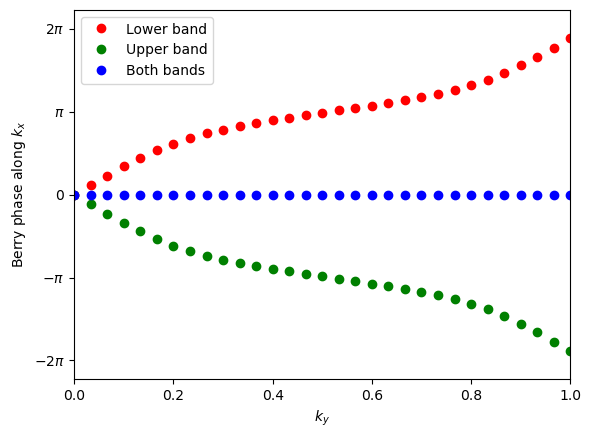

In [6]:
# plot Berry phases
fig, ax = plt.subplots()
ky = np.linspace(0, 1, len(phi_1))
ax.plot(ky, phi_0, "ro", label="Lower band")
ax.plot(ky, phi_1, "go", label="Upper band")
ax.plot(ky, phi_both, "bo", label="Both bands")

ax.legend()
ax.set_xlabel(r"$k_y$")
ax.set_ylabel(r"Berry phase along $k_x$")
ax.set_xlim(0.0, 1.0)
ax.set_ylim(-7.0, 7.0)
ax.yaxis.set_ticks([-2 * np.pi, -np.pi, 0, np.pi, 2 * np.pi])
ax.set_yticklabels((r"$-2\pi$", r"$-\pi$", r"$0$", r"$\pi$", r"$2\pi$"))

Verify with calculation of Chern numbers

In [9]:
mesh.is_axis_closed(0)

True

In [7]:
chern0 = wf_array_1.chern_num(state_idx=[0], plane=(0,1))
chern1 = wf_array_1.chern_num(state_idx=[1], plane=(0,1))

print("Chern number for lower band = ", chern0)
print("Chern number for upper band = ", chern1)

0
1
0
1
Chern number for lower band =  -1.0
Chern number for upper band =  1.0


/Users/treycole/miniforge3/envs/pythtb/lib/python3.12/site-packages/numpy/linalg/_linalg.py:2371: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/treycole/miniforge3/envs/pythtb/lib/python3.12/site-packages/numpy/linalg/_linalg.py:2371: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
